![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C1.png)

# Quant Simulation Challenge 1 - Price Making

The goal of this challenge is to automate the market-making process, using object-
orientated programming to automatically create a bid-offer spread around the 
reference price. You're expected to provide a 2% bid and offer for each 
trade that your hedge fund clients request.

What is the Market Making process:

When a hedge fund wants to execute a large trade (block trade) they request pricing
from Market Makers. For example, if the hedge fund wants to trade 10,000 Apple 
shares, then they would send a request to the Market Maker that includes the 
information: Asset they would like to trade and volume they would like to trade.
Notice that this hedge fund request does not include the information as to whether 
they would like to buy or sell 10,000 Apple shares. So, the Market Maker needs to 
provide pricing for both scenarios.

- Bid price: A price for the hedge fund to sell at
- Offer price: A price for the hedge fund to buy at

To keep things simple, for Challenge 1, each bid price will be calculated to be 2% 
below the reference price and each offer price will be calculated to be 2% above the 
reference price. The reference price is just the quote price of the asset at any 
moment in time.

For example, if the hedge fund has requested a quote for 10,000 Apple and the 
reference price is currently \\$100. Then as a Market Maker we would provide a 
bid/offer spread:

Bid \\$98 – \\$102 Offer

To start let's import the packages to be used within this notebook.

In [1]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
# The following are publicly available packages:
from matplotlib import pyplot as plt
from pandas import *

In [2]:
# HIDDEN PARAMS BOX

The code below will assign the prices data series and price_requests data series to the two variables to make them available throughout the project.

In [3]:
prices = Data.get_price_series("PricestoFeedserver")
price_requests = Data.get_price_requests("PriceRequeststoFeedserver")

## Challenge 1 Task A 
### Iterate through the first ten Hedge Fund price requests and append to the test_requests list.

The price requests are being reduced to just 10 items to allow for easier creation of an algorithm on a smaller dataset.

In [4]:
test_requests = []

In [5]:
for index in range(0, 10): # Select the first ten prices in the data.
    test_requests.append(price_requests[index])

test_requests

[['FB', 0, 3010],
 ['AAPL', 10000, 6929],
 ['FB', 30000, 7015],
 ['FB', 70000, 4910],
 ['AAPL', 105000, 5783],
 ['AAPL', 110000, 3280],
 ['FB', 115000, 2465],
 ['AAPL', 120000, 656],
 ['FB', 130000, 1948],
 ['FB', 150000, 1386]]

Now that you have appended the items to **test_requests** you can find them in the output below.

The output should follow the format **[ [ ticker, date, volume ], [ ticker, date, volume ], ... ]**

In [6]:
print(test_requests)

[['FB', 0, 3010], ['AAPL', 10000, 6929], ['FB', 30000, 7015], ['FB', 70000, 4910], ['AAPL', 105000, 5783], ['AAPL', 110000, 3280], ['FB', 115000, 2465], ['AAPL', 120000, 656], ['FB', 130000, 1948], ['FB', 150000, 1386]]


##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [7]:
# GRADING CELL

## Challenge 1 Task B
### Identify the reference prices for the first ten requests

Now iterate through the *test_requests* and match them with the relevant *date* and *ticker* in the *prices* variable. Store these reference prices and price_requests in a list called *request_with_prices*.

#### request_with_prices should be in the format [ ([price requests], refPrice), ([price requests], refPrice), ...  ]

In [8]:
request_with_prices = []

In [9]:
for price in prices:  # Iterate through all the prices to match them against the price requests.
    for request in test_requests:  # Iterate through the requests from the Hedge Funds.
        if price[0] == request[0] and price[1] == request[1]:
            request_with_prices.append((request, price[2]))

Run the cell below to check the output for test_requests.

##### The output from test_requests should be in the format: [ ( [price requests], refPrice ), ( [price requests], refPrice ), ... ]

In [10]:
print(request_with_prices)

[(['FB', 0, 3010], 194.44), (['AAPL', 10000, 6929], 74.63035), (['FB', 30000, 7015], 195.7548), (['FB', 70000, 4910], 193.3018), (['AAPL', 105000, 5783], 73.13032), (['AAPL', 110000, 3280], 73.83167), (['FB', 115000, 2465], 185.76), (['AAPL', 120000, 656], 76.55568), (['FB', 130000, 1948], 191.3214), (['FB', 150000, 1386], 195.8163)]



##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [11]:
# GRADING CELL

## Challenge 1 Task C
### Create a bid and offer for the request_with_prices

Now that you have paired the Request with a Reference Price you can create your bid and offer. We will be using Object Oriented Programming here to pass our trade to the Hedge Fund later on.

### **QuotedTrade object**
This object will be used to quote trades and send them to the hedge funds. The object contains the following attributes:
* ticker: String
* trade_volume: Integer
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [12]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price,
                 date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return f'Trade Request for {self.ticker}, {self.trade_volume} shares @ {self.ref_price} on {self.date}. Bid Price: {self.bid_price} and Offer Price: {self.offer_price}'

    def __repr__(self):
        return f'QuotedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, ref_price={self.ref_price}, bid_price={self.bid_price}, offer_price={self.offer_price}, date={self.date})'

Now that you have initialised the QuotedTrade object you can use this as a template for trades.

To do this create your bid and offer in the task below by assigning a 2% spread on each side based on the reference price.

In [13]:
quoted_trades = []

In [14]:
# Replace the ? in this task with your answer.

for matched in request_with_prices:
    price_request, ref_price = matched[0], matched[1]
    ticker, date, trade_vol = price_request[0], price_request[1], price_request[2]
    bid_price = ref_price * 0.98  
    offer_price = ref_price * 1.02  
    
    # Now create the QuotedTrade object and append it to the quoted_trades list.
    trade = QuotedTrade(ticker, trade_vol, ref_price, bid_price, offer_price, date)
    quoted_trades.append(trade)

Run the cell below to check the output for quotedTrades. 

##### In the output below you should see many QuotedTrade objects with their details.

In [15]:
print(quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63035, bid_price=73.137743, offer_price=76.12295700000001, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.7548, bid_price=191.83970399999998, offer_price=199.669896, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3018, bid_price=189.43576399999998, offer_price=197.167836, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13032, bid_price=71.6677136, offer_price=74.5929264, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83167, bid_price=72.3550366, offer_price=75.3083034, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.55568, bid_price=75.0245664, offer_price=78.0867936, date=120000), Quot

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [16]:
# GRADING CELL

## Challenge 1 Task D
### Interact with the Hedge Fund to Show quoted_trades and recieve a response.

Using the *quoted_trades* list interact with the HF object to receive a "Buy, Sell, Refuse" response from the HF and store these *HfResponse* objects in an list called *hf_responses*.

##### Sends the quoted_trade object to the hedge fund to make a decision for a trade.
```python
hf.show(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* HfResponse( ticker: String, trade_volume: Integer, trade_price: Float, hf_action: String, ref_price: Float, bid_price: Float, offer_price: Float, date: Integer )

In [17]:
hf_responses = []

In [18]:
# Replace the ? in this task with your answer.

for trade in quoted_trades:
    response = hf.show(trade)
    hf_responses.append(response)

Run the cell below to check the output for the responses from the Hedge Fund. 

##### In the output below you should see many HfResponse objects with their details.

In [19]:
print(hf_responses)

[HfResponse(ticker=FB, trade_volume=3010, trade_price=190.5512, hf_action=sell, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), HfResponse(ticker=AAPL, trade_volume=6929, trade_price=76.12295700000001, hf_action=buy, ref_price=74.63035, bid_price=73.137743, offer_price=76.12295700000001, date=10000), HfResponse(ticker=FB, trade_volume=7015, trade_price=191.83970399999998, hf_action=sell, ref_price=195.7548, bid_price=191.83970399999998, offer_price=199.669896, date=30000), HfResponse(ticker=FB, trade_volume=4910, trade_price=197.167836, hf_action=buy, ref_price=193.3018, bid_price=189.43576399999998, offer_price=197.167836, date=70000), HfResponse(ticker=AAPL, trade_volume=5783, trade_price=71.6677136, hf_action=sell, ref_price=73.13032, bid_price=71.6677136, offer_price=74.5929264, date=105000), HfResponse(ticker=AAPL, trade_volume=3280, trade_price=72.3550366, hf_action=sell, ref_price=73.83167, bid_price=72.3550366, offer_price=75.3083034, date=110000), HfRespon

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [20]:
# GRADING CELL

## Challenge 1 Task E
### Begin logging your actions with the Market Maker class and functions.

### Initialise the Market Maker Object

To be able to use the Market Maker in this simulation we run the code in the cell below to create the object. The Market Maker object contains the following properities.

#### Market Maker object contains:
* current_positions: Dictionary of current_position objects - {ticker: String, current_position: Object}
  * current_position: Custom Object
    * ticker: String
    * position_volume: Integer
    * open_price: Float
    * date: Integer
* quoted_trades: List of quoted_trade objects - [quoted_trade, quoted_trade, …]
  * quoted_trade: Custom Object
* completed_trades: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object
* ETF_positions: List of completed_trade objects - [completed_trade, completed_trade, ...]
  * completed_trade: Custom Object


In [21]:
mm = MarketMaker.mm()

 As a Market Maker, it is imperative to keep a log of the trades quoted and clients' responses. As a result, interact with the MM object to store the quoted_trades lists into the logs.

#### Add a trade to Market Makers history
```python
mm.add_quoted_trade(QuotedTrade)
```
***Parameters:***
* QuotedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

In [22]:
for quote in quoted_trades:
    # Use the function to add each quote to the Market Maker
    mm.add_quoted_trade(quote)

Run the cell below to check the output for market maker quoted_trades. 

##### In the output below you should see many QuotedTrade objects with their details.

In [23]:
print(mm.quoted_trades)

[QuotedTrade(ticker=FB, trade_volume=3010, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), QuotedTrade(ticker=AAPL, trade_volume=6929, ref_price=74.63035, bid_price=73.137743, offer_price=76.12295700000001, date=10000), QuotedTrade(ticker=FB, trade_volume=7015, ref_price=195.7548, bid_price=191.83970399999998, offer_price=199.669896, date=30000), QuotedTrade(ticker=FB, trade_volume=4910, ref_price=193.3018, bid_price=189.43576399999998, offer_price=197.167836, date=70000), QuotedTrade(ticker=AAPL, trade_volume=5783, ref_price=73.13032, bid_price=71.6677136, offer_price=74.5929264, date=105000), QuotedTrade(ticker=AAPL, trade_volume=3280, ref_price=73.83167, bid_price=72.3550366, offer_price=75.3083034, date=110000), QuotedTrade(ticker=FB, trade_volume=2465, ref_price=185.76, bid_price=182.04479999999998, offer_price=189.4752, date=115000), QuotedTrade(ticker=AAPL, trade_volume=656, ref_price=76.55568, bid_price=75.0245664, offer_price=78.0867936, date=120000), Quot

### Create another object to be used during this event following a similar structure to the QuotedTrade class.

**Create a CompletedTrade object**

This object will be used to log successful trades to the market maker object. The object should contain the following attributes:
* ticker: String
* trade_volume: Integer
* trade_price: Float
* mm_action: String
* ref_price: Float
* bid_price: Float
* offer_price: Float
* date: Integer

In [24]:
class CompletedTrade:
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price = trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date

    def __str__(self):
        return (f'Completed Trade for {self.ticker}, {self.trade_volume} shares @ {self.trade_price} on {self.date}. '
                f'Action: {self.mm_action}, Reference Price: {self.ref_price}, '
                f'Bid Price: {self.bid_price}, Offer Price: {self.offer_price}')

    def __repr__(self):
        return (f'CompletedTrade(ticker={self.ticker}, trade_volume={self.trade_volume}, trade_price={self.trade_price}, '
                f'mm_action={self.mm_action}, ref_price={self.ref_price}, bid_price={self.bid_price}, '
                f'offer_price={self.offer_price}, date={self.date})')

### Interact with the MM object to store the CompletedTrade objects into the logs.

#### Update the Market Makers current positions.
```python
mm.add_trade(CompletedTrade)
```
***Parameters:***
* CompletedTrade: Custom Object

***Returns:***
* String: Indicating a successfully added trade or failed added trade.

#### Throughout this simulation the hfAction has the possibility to be the following: "buy", "sell" and "refuse"

In [25]:
for response in hf_responses: # Loops through the hf_responses for each response
        
    # Collection of conditionals for "buy", "sell" and "refuse"
    if response.hf_action == "buy": # Identifies the HF action to be converted into the MM action
        completed_trade = CompletedTrade(
            ticker=response.ticker,  
            trade_volume=response.trade_volume,  
            trade_price=response.trade_price,  
            mm_action="sell",  
            ref_price=response.ref_price,  
            bid_price=response.bid_price,  
            offer_price=response.offer_price,  
            date=response.date
        )
        mm.add_trade(completed_trade)
    elif response.hf_action == "sell": # Identifies the HF action to be converted into the MM action
        completed_trade = CompletedTrade(
            ticker=response.ticker,  
            trade_volume=response.trade_volume,  
            trade_price=response.trade_price,  
            mm_action="buy",  
            ref_price=response.ref_price,  
            bid_price=response.bid_price,  
            offer_price=response.offer_price,  
            date=response.date
        )
        mm.add_trade(completed_trade)
    elif response.hf_action == "refuse":  # If the hedge fund refuses the trade
        print(f"Trade for {response.ticker} refused by the hedge fund.")

Run the cell below to check the output for market maker quoted_trades. 

##### In the output below you should see many CompletedTrade objects with their details.

In [26]:
print(mm.completed_trades)

[CompletedTrade(ticker=FB, trade_volume=3010, trade_price=190.5512, mm_action=buy, ref_price=194.44, bid_price=190.5512, offer_price=198.3288, date=0), CompletedTrade(ticker=AAPL, trade_volume=6929, trade_price=76.12295700000001, mm_action=sell, ref_price=74.63035, bid_price=73.137743, offer_price=76.12295700000001, date=10000), CompletedTrade(ticker=FB, trade_volume=7015, trade_price=191.83970399999998, mm_action=buy, ref_price=195.7548, bid_price=191.83970399999998, offer_price=199.669896, date=30000), CompletedTrade(ticker=FB, trade_volume=4910, trade_price=197.167836, mm_action=sell, ref_price=193.3018, bid_price=189.43576399999998, offer_price=197.167836, date=70000), CompletedTrade(ticker=AAPL, trade_volume=5783, trade_price=71.6677136, mm_action=buy, ref_price=73.13032, bid_price=71.6677136, offer_price=74.5929264, date=105000), CompletedTrade(ticker=AAPL, trade_volume=3280, trade_price=72.3550366, mm_action=buy, ref_price=73.83167, bid_price=72.3550366, offer_price=75.3083034, 

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [27]:
# GRADING CELL

## Challenge 1 Task F
### Create a graphical output for all the AAPL quoted trades.

The graph should be created using the matplotlib library. It should show all the quoted trades completed for the ticker AAPL and visualise the *Bid, Offer and Reference Price* against *Date*.

#### Initialise the plot with the <python>fig, axes = plt.subplots() </python> function. 
#### Populate the lists given, and plot them using <python>axes.plot()</python>.

Completed Trade for AAPL, 6929 shares @ 76.12295700000001 on 10000. Action: sell, Reference Price: 74.63035, Bid Price: 73.137743, Offer Price: 76.12295700000001
Completed Trade for AAPL, 5783 shares @ 71.6677136 on 105000. Action: buy, Reference Price: 73.13032, Bid Price: 71.6677136, Offer Price: 74.5929264
Completed Trade for AAPL, 3280 shares @ 72.3550366 on 110000. Action: buy, Reference Price: 73.83167, Bid Price: 72.3550366, Offer Price: 75.3083034
Completed Trade for AAPL, 656 shares @ 75.0245664 on 120000. Action: buy, Reference Price: 76.55568, Bid Price: 75.0245664, Offer Price: 78.0867936


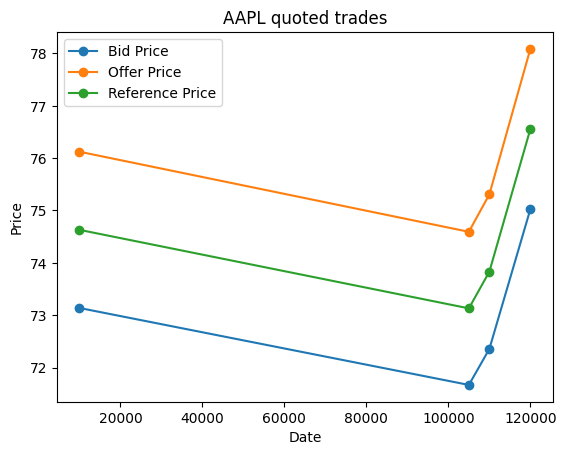

In [28]:
# Initalises the lists to store all the data
bid_data = []
offer_data = []
quote_dates = []
ref_price_data = []

for trade in mm.completed_trades: # Iterate through the completed trades to find the AAPL trades and store the data.
    # Append the bid_data and offer_data and quote_dates.
     if trade.ticker == "AAPL":
        print(trade)
        bid_data.append(trade.bid_price)
        offer_data.append(trade.offer_price)
        ref_price_data.append(trade.ref_price)
        quote_dates.append(trade.date)

# sort by date
sorted_data = sorted(zip(quote_dates, bid_data, offer_data, ref_price_data))
quote_dates, bid_data, offer_data, ref_price_data = zip(*sorted_data)

fig, ax = plt.subplots()
ax.plot(quote_dates, bid_data, label='Bid Price', marker='o')
ax.plot(quote_dates, offer_data, label='Offer Price', marker='o')
ax.plot(quote_dates, ref_price_data, label='Reference Price', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL quoted trades')
ax.legend()
plt.show()

##### In the print statements below you should be able to see equal length lists for each list.

In [29]:
print("bid_data:", bid_data)
print("offer_data:", offer_data)
print("quote_dates:", quote_dates)

bid_data: (73.137743, 71.6677136, 72.3550366, 75.0245664)
offer_data: (76.12295700000001, 74.5929264, 75.3083034, 78.0867936)
quote_dates: (10000, 105000, 110000, 120000)


The quote_dates, bid_data and offer_data are now assigned to the corresponding list. 

#### Next find the reference prices for AAPL as we have gaps in our dates.

In [30]:
# Replace the ? in this task with your answer.

ref_data = []
ref_dates = []

for price in prices: # Iterate through the quotes to find each AAPL ticker and matching price data.
    # Add filtering to ensure we find AAPL trades and all trades upto the last quote_dates.
    # Append the ref_data and ref_dates
    ticker = price[0]
    date = price[1]
    ref_price = price[2]
    
    if ticker == 'AAPL' and date <= max(quote_dates):
        ref_data.append(ref_price)
        ref_dates.append(date)

##### In the print statements below you should be able to see equal length lists for each list. The ref_dates should go untill the last quote_dates

In [31]:
print("ref_data:", ref_data)
print("ref_dates:", ref_dates)

ref_data: [74.7, 74.81399, 74.63035, 73.83297, 75.24267, 73.96348, 74.21224, 74.7025, 75.3794, 74.01008, 73.25939, 73.07788, 72.87701, 72.46131, 72.40942, 72.33, 71.4357, 71.48568, 71.59145, 72.52946, 72.84222, 73.13032, 73.83167, 75.685, 76.55568]
ref_dates: [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000]


#####  Finally we must plot each of the axes.

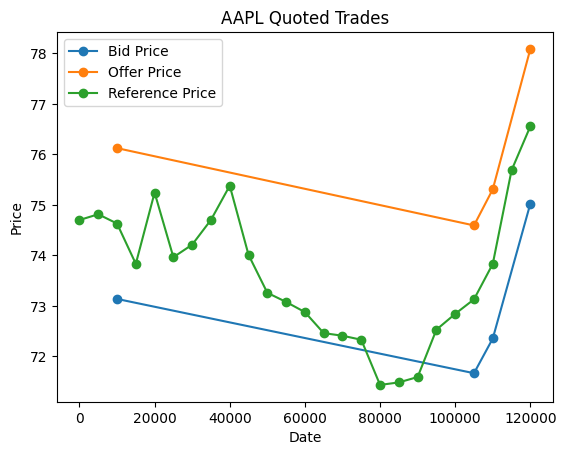

In [32]:
axes = plt.subplot() # Creates the Axis.

axes.plot(quote_dates, bid_data, label='Bid Price', marker='o')
axes.plot(quote_dates, offer_data, label='Offer Price', marker='o')
axes.plot(ref_dates, ref_data, label='Reference Price', marker='o')  # ref_dates and ref_data for reference prices

# Add labels and title
axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.set_title('AAPL Quoted Trades')

# Add a legend to differentiate the lines
axes.legend()

# Show the plot
plt.show()

##### The cell below is used to grade the work after the event. You do not need to do anything here.

In [33]:
# GRADING CELL

![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C2.png)

## Quant Simulation Challenge 2 - Skewed Price Making


This challenge requires you to build on the simple bid/offer spreads calculated in 
Challenge 1 and now adding a layer of complexity.

In reality, the bid/offer pricing provided by a Market Maker to their hedge fund 
clients are not always +/- 2% equidistant around the reference price. A Market 
Maker will often ‘Skew’ their bid/offer pricing in order to reflect any current open 
positions of risk that they have in that asset.

For example, if a hedge fund client requests a quote for 10,000 Apple shares and
the Market Maker is already long Apple shares (from facilitating a different 
client’s trade), then the Market Maker will factor in this open position when 
calculating their bid/offer spread for this new client.

If the Market Maker is already long, then preferably they WOULD NOT like to buy 
any more shares and increase their risk. Instead, they WOULD prefer to sell 
Apple shares and in so doing reduce their risk. So, the Market Maker can skew 
their bid/offer spread in order to decrease the chances of buying and increase 
the chances of selling. Visa versa of the Market Maker is already short.
For example, if the reference price of Apple is $100 the:

- Skewing when already long:
Bid \\$95 - \\$101 Offer
- Skewing when already short:
Bid \\$99 - \\$105 Offer

So lets now add this layer of complexity into our code.

**Next, let's import the packages to be used within these challenges**

In [34]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
from AmplifyQuantTrading import Exchange
from AmplifyQuantTrading import MarketMaker
from AmplifyQuantTrading import HedgeFund as hf
# The following are publicly available packages:
from matplotlib import pyplot as plt
from pandas import *

In [35]:
# HIDDEN PARAMS BOX

## Initial Setup of Classes

<hr>

### **QuotedTrade object**
This object will be used to quote trades and send them to the hedge funds. The object contains the following attributes:
* ticker: String
* tradeVolume: Integer
* refPrice: Float
* bidPrice: Float
* offerPrice: Float
* date: Integer

<hr>

### **CompletedTrade object**
This object will be used to log successful quotedTrades to the market maker object. The object should contain the following attributes:
* ticker: String
* tradeVolume: Integer
* tradePrice: Float
* mmAction: String
* date: Integer

In [36]:
class QuotedTrade:
    def __init__(self, ticker, trade_volume, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date
        
class CompletedTrade:
    def __init__(self, ticker, trade_volume, trade_price, mm_action, ref_price, bid_price, offer_price, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.trade_price = trade_price
        self.mm_action = mm_action
        self.ref_price = ref_price
        self.bid_price = bid_price
        self.offer_price = offer_price
        self.date = date 

## Challenge 2 Task A
### Using the code learned in challenge 1 apply an algorithm to all price requests and skew based on risk.

<hr>

Using the MM function, access the *current_positions* to determine the firm's risk at any given moment. 

You will then need to use this information to decide if you're Axed Long, Axed Short or Neutral in your position. 

This will then be reflected in your Bid and Offer prices.

<hr>

#### Market Maker Functions to be used for this task

* mm.current_positions
* mm.add_quoted_trade
* mm.add_trade

#### Hedge Fund Functions to be used for this task

* hf.show

#### Hint: Try to start with looping through the price_requests with prices and checking the risk

<hr>

#### Remember to log any *QuotedTrades* and *CompletedTrades* to your MM object or risk penalties for poor risk management.

In [37]:
# The code below creates the MarketMaker Object
mm = MarketMaker.mm()
# The code below will assign the prices data series and price_requests data series to the two variables.
prices = Data.get_price_series("PricestoFeedserverExtended")
price_requests = Data.get_price_requests("PriceRequeststoFeedserverExtended")

In [38]:
# check initial position
tickers = ['FB', 'AAPL', 'GOOGL', 'AMZN', 'NFLX']
for t in tickers:
    print(mm.current_positions[t])

Current Position for FB, 0 shares @ 0 on 0.
Current Position for AAPL, 0 shares @ 0 on 0.
Current Position for GOOGL, 0 shares @ 0 on 0.
Current Position for AMZN, 0 shares @ 0 on 0.
Current Position for NFLX, 0 shares @ 0 on 0.


In [39]:
for request in price_requests:
    ticker, date, volume = request
    for price in prices:
        if price[0] == ticker and price[1] == date:
            ref_price = price[2]
            current_position = mm.current_positions[ticker]
            position_volume = current_position.position_volume
            
            bid_price = ref_price * 0.98
            offer_price = ref_price * 1.02
            # if MM is long, lower bid and higher offer
            if position_volume > 0:
                bid_price = ref_price * 0.95 
                offer_price = ref_price * 1.01 
            elif position_volume < 0:  # if short, higher bid and lower offer
                bid_price = ref_price * 0.99
                offer_price = ref_price * 1.05 
            
            quoted_trade = QuotedTrade(ticker, volume, ref_price, bid_price, offer_price, date)
            mm.add_quoted_trade(quoted_trade)
            response = hf.show(quoted_trade)
            if response.hf_action == "buy":
                completed_trade = CompletedTrade(
                    ticker=ticker,
                    trade_volume=volume,
                    trade_price=response.trade_price,
                    mm_action="sell",
                    ref_price=ref_price,
                    bid_price=bid_price,
                    offer_price=offer_price,
                    date=request[1]
                )
                mm.add_trade(completed_trade)
            elif response.hf_action == "sell":
                completed_trade = CompletedTrade(
                    ticker=ticker,
                    trade_volume=volume,
                    trade_price=response.trade_price,
                    mm_action="buy",
                    ref_price=ref_price,
                    bid_price=bid_price,
                    offer_price=offer_price,
                    date=request[1]
                )
                mm.add_trade(completed_trade)

In [40]:
# check final position
tickers = ['FB', 'AAPL', 'GOOGL', 'AMZN', 'NFLX']
for t in tickers:
    print(mm.current_positions[t])

Current Position for FB, -339722 shares @ 254.53 on 5680000.
Current Position for AAPL, 42389 shares @ 114.79 on 5605000.
Current Position for GOOGL, -446084 shares @ 1489.32 on 5610000.
Current Position for AMZN, 521733 shares @ 2496.7 on 5670000.
Current Position for NFLX, 303533 shares @ 424.4 on 5700000.


In [41]:
# GRADING CELL

## Challenge 2 Task B
### Create a graphical output for one of the tickers you created Quoted Trades for.

<hr>

#### Hint: Use the code from the Challenge 1 task.

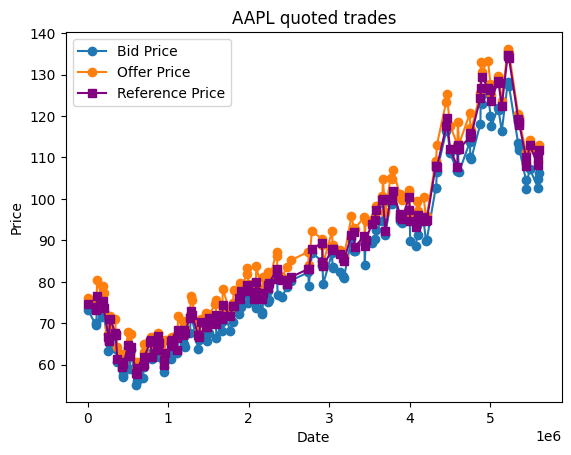

In [42]:
# We use AApl

bid_data = []
offer_data = []
ref_price_data = []
quote_dates = []
for trade in mm.completed_trades:
    if trade.ticker == "AAPL":
        bid_data.append(trade.bid_price)
        offer_data.append(trade.offer_price)
        ref_price_data.append(trade.ref_price)
        quote_dates.append(trade.date)

sorted_data = sorted(zip(quote_dates, bid_data, offer_data, ref_price_data))
quote_dates, bid_data, offer_data, ref_price_data = zip(*sorted_data)

fig, ax = plt.subplots()
ax.plot(quote_dates, bid_data, label='Bid Price', marker='o')
ax.plot(quote_dates, offer_data, label='Offer Price', marker='o')
ax.plot(quote_dates, ref_price_data, label='Reference Price', marker='s', color='purple')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('AAPL quoted trades')
ax.legend()
plt.show()

![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C3_Prelim.png)

# Quant Simulation - Beta Research

<hr>

For this research section, your job is to calculate the beta of the price volatility of each of the 5 single stocks relative to the FAANG ETF. You should then use your beta values to help implement an optimised hedging strategy for Challenge 3.

<hr>

**To start let's import the packages to be used within this notebook**

In [43]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
# The following are publicly available packages:
from matplotlib import pyplot as plt
import pandas

# How we calculate the FAANG ETF

<hr>

It may be useful for you to know how the FAANG ETF is calculated. The FAANG ETF is an exchange traded product that is made up of 5 component equity assets: Facebook, Amazon, Apple, Netflix and Google
.
The FAANG ETF is an equally dollar weighted index rebased at t0 with no further rebalancing.
The daily value of the ETF is always calculated by taking the average of the 5 rebased components.

For example, at the start of the price series t0, - each of the 5 stock prices are rebased to \\$100 and therefore the ETF's value at t0 = \\$100.

![](https://algo-assets.amplifyme.com/quant/FAANG-t0.png)

At t1 the value of each rebased stock changes from its starting value of 100 by the percentage value that the actual stock price changed between time to and time t1.

As a simple example, if Apple's share price rose by 1% between time to and time t1, then the value of the rebased Apple component moves from \\$100 to \\$101.

If Facebook's share price dropped by 0.5% between time to and time t1 then the value of the rebased Facebook component moves from \\$100 to \\$99.5 and so on.

The FAANG ETF at t1 is simply the average of the 5 rebased component prices at t1. Below is an image explaining how the value of the FAANG ETF at t1 is calculated:


![](https://algo-assets.amplifyme.com/quant/FAANG-t1.png)

<hr> 

# ETF Hedge Research

<hr>

In the Market Maker simulation, you hedged your exposure to each individual stock, by taking the opposite position in the ETF; so when you were long \\$1m of Facebook, you would sell \\$1m of the ETF.


This ‘nominal’ hedge is not accurate however, as the Facebook share price can in general be much more, or less, volatile than the ETF price. 

<hr>

To assess the relative volatility of a stock compared to the ETF you can use Beta: 

https://www.investopedia.com/ask/answers/070615/what-formula-calculating-beta.asp

<hr>

## Trader Research Task A
### Find the Beta to create the correct hedge for each stock against the ETF

<hr>

In the prices dataseries that is being imported below you have access to 6 months of data for the FAANG stocks and ETF. 

The goal in this task is to use Python to research the Beta of each stock to find the correct ratio of ETF to individual equity position. 

<hr>


**Extra hint:** Calculating Beta

You can use the panda's in python to calculate the co-variance based on % changes

In [44]:
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate") to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate")

In [45]:
prices_FB = []
prices_AAPL = []
prices_AMZN = []
prices_NFLX =[]
prices_GOOGL = []
prices_FAANG = []

for price in prices:
    if price[0] == "AAPL":
        prices_AAPL.append(price)
    elif price[0] == "FB":
        prices_FB.append(price)
    elif price[0] == "GOOGL":
        prices_GOOGL.append(price)
    elif price[0] == "AMZN":
        prices_AMZN.append(price)
    elif price[0] == "NFLX":
        prices_NFLX.append(price)
    elif price[0] == "FAANG":
        prices_FAANG.append(price)
        
AAPL_change = pandas.DataFrame(prices_AAPL)[2].pct_change()[1:]
FB_change = pandas.DataFrame(prices_FB)[2].pct_change()[1:]
GOOGL_change = pandas.DataFrame(prices_GOOGL)[2].pct_change()[1:]
AMZN_change = pandas.DataFrame(prices_AMZN)[2].pct_change()[1:]
NFLX_change = pandas.DataFrame(prices_NFLX)[2].pct_change()[1:]
FAANG_change = pandas.DataFrame(prices_FAANG)[2].pct_change()[1:]

In [46]:
beta_AAPL = AAPL_change.cov(FAANG_change) / FAANG_change.var()
beta_FB = FB_change.cov(FAANG_change) / FAANG_change.var()
beta_GOOGL = GOOGL_change.cov(FAANG_change) / FAANG_change.var()
beta_AMZN = AMZN_change.cov(FAANG_change) / FAANG_change.var()
beta_NFLX = NFLX_change.cov(FAANG_change) / FAANG_change.var()

print(beta_AAPL, beta_FB, beta_GOOGL, beta_AMZN, beta_NFLX)

0.8654998782785939 1.032168561294011 1.2685971443879318 0.9197248470422079 0.9212976497161782


![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C3.png)

## Quant Simulation Challenge 3 - ETF Hedging



### Relevant Market Maker Functions
- mm.current_positions
- mm.add_quoted_trade
- mm.add_trade

NOTE Any QuotedTrades and CompletedTrades are to be explicitly logged to the MM object to avoid penalties for poor risk management.


### Hedge Fund Object
The Hedge Fund Object is used to Show quoted_trades and receive a response.

Using the quoted_trades list interact with the HF object to receive a "Buy, Sell, Refuse" response from the HF and store these HfResponse objects in an list called hf_responses.

###### Sends the quoted_trade object to the hedge fund to make a decision for a trade.
hf.show(QuotedTrade)

##### Parameters:
- QuotedTrade: Custom Object

##### Returns:
- HfResponse( ticker: String, trade_volume: Integer, trade_price: Float, hf_action: String, ref_price: Float, bid_price: Float, offer_price: Float, date: Integer )

### HfResponse object
- ticker: String
- trade_volume: Integer
- trade_price: Float
- hf_action: String
- ref_price: Float
- bid_price: Float
- offer_price: Float
- date: Integer

<hr>

### Relevant functions to be used for this task

##### Execute a FAANG trade
```python
Exchange.execute(ExchangeTrade)
```

*Parameters:*
* ExchangeTrade: Custom Object

*Returns:*
* ExecutedTrade( ticker: String, trade_volume: Integer, ref_price: Float, trade_price: Float, action: String, date: Integer )

##### Update the Market Makers current ETF position.
```python
mm.update_ETF_position(ExecutedTrade)
```
*Parameters:*
* ExecutedTrade: Custom Object from exchange return

*Returns:*
* String: Indicating a successfully added trade or failed added trade.

<hr>

Log the response for Exchange.execute(ExchangeTrade) with the *mm.update_ETF_position(ExecutedTrade)*  

## Challenge 3 Task A
### Using your code from the task above, add a hedge that is determined by the correlation of the risk taken on against the FAANG ETF

<hr>

In this task you can copy and paste your solution from challenge 2, and then add an extra function that uses the Traders’ research of the Beta of each stock to the ETF, to then execute an optimised hedge for each stock in the exchange using the ExchangeTrade object.

For example, if AAPL’s Beta compared to the ETF FAANG was calculated by the Traders to be 0.833. This means that the average volatility of AAPL’s share price is less than the average volatility of the FAANG price.  So, as a Market Maker, if you have $1M worth of long AAPL risk, then you would need to hedge this with a smaller \\$ amount of FAANG. Therefore, you would sell 0.833 x \\$1M = \\$833,000 of FAANG to complete a more optimized hedge.


##### Once you have determined the ratio of FAANG ETF to equity position held by the market maker, you need to create an ExchangeTrade object to interact with the exchange and execute the ETF trade based on the equity position held.

### ExchangeTrade object
<hr>

To get started you need to create an ExchangeTrade object This will be used to create a trade that will be executed using the exchange. As this is similar to the two you have done before we have drafted the code to run for you below which contains the following attributes:

* ticker: String
* trade_volume: Integer
* ref_price: Float
* action: String
* date: Integer

In [47]:
class ExchangeTrade:
    def __init__(self, ticker, trade_volume, ref_price, action, date):
        self.ticker = ticker
        self.trade_volume = trade_volume
        self.ref_price = ref_price
        self.action = action
        self.date = date

Hint - For this challenge, prices series will be stored in a Pandas Dataframe.

In [48]:
# The code below creates the MarketMaker Object
mm = MarketMaker.mm()
prices = Data.get_price_series("PricestoFeedserverEtfUpdate", True)
price_requests = Data.get_price_requests("PriceRequeststoFeedserverExtended")

In [49]:
betas = {}
betas['AAPL'] = beta_AAPL
betas['FB'] = beta_FB
betas['GOOGL'] = beta_GOOGL
betas['AMZN'] = beta_AMZN
betas['NFLX'] = beta_NFLX
betas

{'AAPL': 0.8654998782785939,
 'FB': 1.032168561294011,
 'GOOGL': 1.2685971443879318,
 'AMZN': 0.9197248470422079,
 'NFLX': 0.9212976497161782}

In [50]:
import copy
mm_pos = {} # for debug use

In [51]:
mm = MarketMaker.mm()
request_dates = [] # keep track of request dates, which is diff from prices.index
ETF_pos = [] # keep track of ETF positions
ETF_vol = 0
ETF_daily_vol = [] # keep track of daily position of ETF

combined_nominal_risk = []
tickers = ['FB', 'AAPL', 'GOOGL', 'AMZN', 'NFLX', 'FAANG']
individual_ticker_risks = {ticker: [] for ticker in tickers}

for request in price_requests:
    ticker, date, volume = request    
    request_dates.append(date)
    ref_price = prices.loc[date, ticker]
    beta = betas[ticker]

    position_volume = mm.current_positions[ticker].position_volume

    bid_price = ref_price * 0.98
    offer_price = ref_price * 1.02

    if position_volume > 0:  # Market Maker is long, lower bid and higher offer
        bid_price = ref_price * 0.95 
        offer_price = ref_price * 1.01 
    elif position_volume < 0:  # Market Maker is short, higher bid and lower offer
        bid_price = ref_price * 0.99
        offer_price = ref_price * 1.05 
    
    quoted_trade = QuotedTrade(ticker, volume, ref_price, bid_price, offer_price, date)
    mm.add_quoted_trade(quoted_trade)

    # interact with hf
    response = hf.show(quoted_trade)
    if response.hf_action == "buy":
        completed_trade = CompletedTrade(
            ticker=ticker,
            trade_volume=volume,
            trade_price=response.trade_price,
            mm_action="sell",
            ref_price=ref_price,
            bid_price=bid_price,
            offer_price=offer_price,
            date=request[1]
        )
    elif response.hf_action == "sell":
        completed_trade = CompletedTrade(
            ticker=ticker,
            trade_volume=volume,
            trade_price=response.trade_price,
            mm_action="buy",
            ref_price=ref_price,
            bid_price=bid_price,
            offer_price=offer_price,
            date=request[1]
        )
    mm.add_trade(completed_trade)
    
    # hedge with ETF
    equity_value = abs(volume) * ref_price
    hedge_amount = beta * equity_value
    faang_ref_price = prices.loc[date, 'FAANG']
    faang_trade_volume = hedge_amount / faang_ref_price

    if faang_trade_volume < 0:
        print("something wrong, faang_trade_volume should be always positive") # debug use
        break

    if position_volume > 0:  # If long the stock, sell FAANG to hedge
        hedge_trade = ExchangeTrade("FAANG", faang_trade_volume, faang_ref_price, "sell", date)
        ETF_daily_vol.append(-faang_trade_volume)
        ETF_vol -= faang_trade_volume
        ETF_pos.append(ETF_vol)
        ExecutedTrade = Exchange.execute(hedge_trade)
        mm.update_ETF_position(ExecutedTrade)
    elif position_volume < 0:  # If short the stock, buy FAANG to hedge
        hedge_trade = ExchangeTrade("FAANG", faang_trade_volume, faang_ref_price, "buy", date)
        ETF_daily_vol.append(faang_trade_volume)
        ETF_vol += faang_trade_volume
        ETF_pos.append(ETF_vol)
        ExecutedTrade = Exchange.execute(hedge_trade)
        mm.update_ETF_position(ExecutedTrade)
    else:
        ETF_daily_vol.append(0)
        ETF_pos.append(0)

    # update nominal risks
    total = 0
    for t in tickers:
        position_volume = mm.current_positions[t].position_volume
        ref_price = prices.loc[date, t]
        risk_value = position_volume * ref_price
        total += risk_value  # Sum the risk for all assets
        individual_ticker_risks[t].append(risk_value)
    
    combined_nominal_risk.append(total)

    mm_pos[date] = copy.deepcopy(mm.current_positions) # for debug use
        

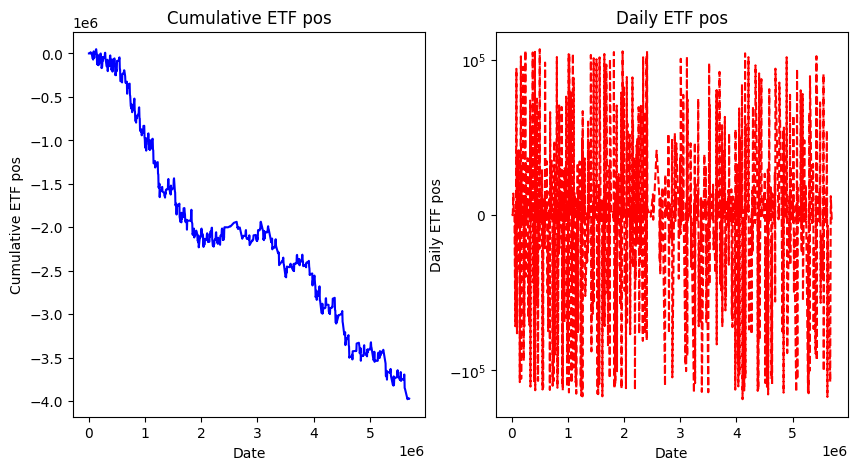

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(request_dates, ETF_pos, 'b-')
ax[0].set_title('Cumulative ETF pos')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumulative ETF pos')

ax[1].plot(request_dates, ETF_daily_vol, 'r--')
ax[1].set_title('Daily ETF pos')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily ETF pos')
ax[1].set_yscale('symlog', linthresh=1e5)


In [53]:
# GRADING CELL

## Challenge 3 Task B
### Create graphical output of the combined nominal risk value over time

<hr>

This will be the nominal value for all risk at any given time from the position you have open. This data will be stored in the balance.

#### Tip: If you have time, create more graphical outputs, all can be used in your short presentation.


In [54]:
# check our net risk value at final position
final_pos = 0
for t in tickers:
    final_pos += prices.loc[5700000][t] * mm_pos[5700000][t].position_volume
final_pos

488157052.3448451

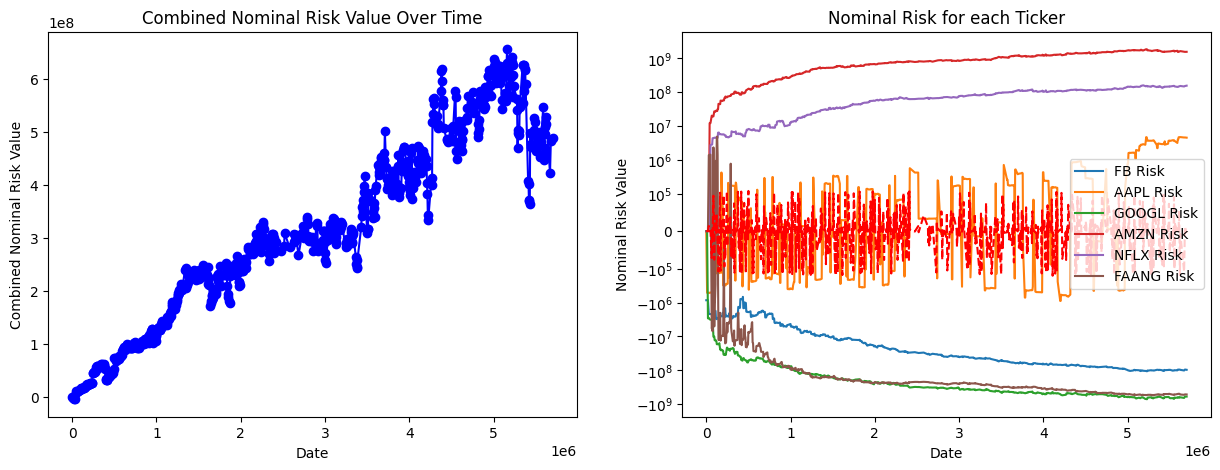

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(request_dates, combined_nominal_risk, label='Combined Nominal Risk', color='blue', marker='o')
ax[0].set_title('Combined Nominal Risk Value Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Combined Nominal Risk Value')

for ticker in tickers:
    ax[1].plot(request_dates, individual_ticker_risks[ticker], label=f'{ticker} Risk')

ax[1].plot(request_dates, ETF_daily_vol, 'r--')
ax[1].set_title('Nominal Risk for each Ticker')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Nominal Risk Value')
ax[1].set_yscale('symlog', linthresh=1e5)
ax[1].legend()



![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C4_Prelim.png)

#  Quant Simulation - Arbitrage Trading Research

<hr>

Arbitrage is a trading strategy that attempts to exploit inefficiencies in the price relationships between highly correlated assets. It involves simultaneously buying (long) an asset and selling (short) a correlated asset to exploit short-term price divergences.

In this simulation you have 5 stocks and an ETF that represents the combined value of those 5 stocks. In theory therefore, the price changes of the ETF should always exactly represent the combined average price changes of the 5 underlying stocks.

However, due to market microstructure inefficiencies, this is not always the case as changes in the ETF may lag its component stocks, especially at times of high volatility.

Your challenge is to try and identify when this happens using the data set provided, and formulate an algorithm that can take advantage of the deviation in values between the value of the 5 stocks, and the ETF that is supposed to match that value.

Hint - Find the divergences and convergences in prices between the FAANG ETF (‘real’) and a synthetically calculated ETF (‘fake’). You need to calculate the synthetic ETF by taking the average of the 5 individual stock prices movements.

<hr>

![](https://algo-assets.amplifyme.com/quant/arbitrage.png)


For example, if at any point the real ETF has a lower value than its components (the fake ETF), there would be an arbitrage trading opportunity to exploit this divergence. Buy the ETF and sell the 5 individual stocks and when the prices have re-converged you can take the trades off to make a net profit from the trades. Visa versa for when the scenario where the real ETF has a higher value than its components.

<hr>



## Arbitrage Trading Research Task A
### Create an algorithm to accurately spot arbitrage opportunities

<hr>

In the prices dataseries that is being imported below you have access to 6 months of data for the FAANG stocks and ETF. 

The goal in this task is to use Python to research and identify the potential arbitrage trading opportunities between the ETF and its components. 

In [56]:
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate") to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate")

In [57]:
prices_FB = []
prices_AAPL = []
prices_AMZN = []
prices_NFLX =[]
prices_GOOGL = []
prices_FAANG = []

for price in prices:
    if price[0] == "AAPL":
        prices_AAPL.append(price)
    elif price[0] == "FB":
        prices_FB.append(price)
    elif price[0] == "GOOGL":
        prices_GOOGL.append(price)
    elif price[0] == "AMZN":
        prices_AMZN.append(price)
    elif price[0] == "NFLX":
        prices_NFLX.append(price)
    elif price[0] == "FAANG":
        prices_FAANG.append(price)

FB_df = pandas.DataFrame(prices_FB)[2]
AAPL_df = pandas.DataFrame(prices_AAPL)[2]
AMZN_df = pandas.DataFrame(prices_AMZN)[2]
NFLX_df = pandas.DataFrame(prices_NFLX)[2]
GOOGL_df = pandas.DataFrame(prices_GOOGL)[2]
FAANG_df = pandas.DataFrame(prices_FAANG)[2]

In [58]:
arbitrages = []
for i in range(len(FAANG_df)):
    average_stock_price = (FB_df[i]/FB_df[0] + AAPL_df[i]/AAPL_df[0] + AMZN_df[i]/AMZN_df[0] + NFLX_df[i]/NFLX_df[0] + GOOGL_df[i]/GOOGL_df[0])/5*100
    faang_price = FAANG_df[i]
    price_difference = average_stock_price - faang_price
    if abs(price_difference) > faang_price * 0.00001: # if diff is smaller than this threshold we just ignore
        arbitrages.append(price_difference)
    else:
        arbitrages.append(0)

df_price_diff = pandas.DataFrame(arbitrages, columns=['price_diff'])
non_zero_dates = df_price_diff[df_price_diff['price_diff'] != 0]
print('number of dates for arbitrage:', non_zero_dates.shape[0], ', total dates', FAANG_df.shape[0])
non_zero_dates.head()

number of dates for arbitrage: 187 , total dates 1141


,price_diff
13,0.737126
14,0.979125
15,-3.200565
16,-2.821221
17,-1.033196


### b) Use the space below to test out graphs showcasing your research

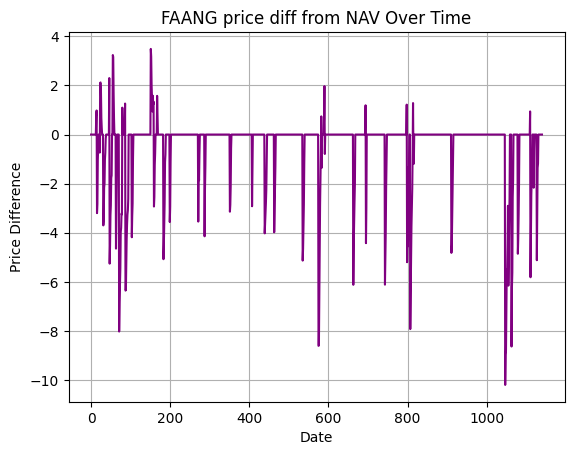

In [59]:
plt.plot(df_price_diff.index, df_price_diff['price_diff'], color='purple')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('FAANG price diff from NAV Over Time')
plt.grid(True)
plt.show()

![](https://algo-assets.amplifyme.com/quant/millenium/Millenium_Quant_C4.png)

## Quant Simulation Challenge 4 - Arbitrage Trading

<hr>

Arbitrage is a trading strategy that exploits inefficiencies in the price relationships between highly correlated assets. It involves the simultaneous purchase of one asset and sale of a correlated asset to exploit any short-lived divergences in price.

In this simulation you have 5 stocks and an ETF that represents the value of those 5 stocks. In theory therefore, their value should always be equal.

However, this is not always the case in reality due to market slippage. In challenge 4 premiliminary work you researched where there may be opportunities to execute a trade on the ETF and the ETF’s component stocks to exploit these temporary pricing inefficiencies.

Your challenge is to try and identify when these short-term price divergences happen using the data set provided. Then, formulate an algorithm that can take advantage of the deviation in values between the value of the underlying 5 stocks and the ETF that is supposed to match that value.

For example, if at any point the ETF has a higher value than its components, there would be an arbitrage trading opportunity to sell the ETF and buy an equivalent amount of the 5 underlaying stocks. When the prices have re-converged you can exit the positions to make a profit from the trade.

In [60]:
# The code in this cell is used to import the packages to be used throughout this notebook.
# The following are private packages available only during this simulation:
from AmplifyQuantTrading import Data
# The following are publicly available packages:
from matplotlib import pyplot as plt
import pandas
# The code in this cell is used to import the packages to be used throughout this task.
from AmplifyArbitrageTrading import HedgeFund
# The code in this cell assigns the Data.get_price_series("PricestoFeedserverEtfUpdate", True) to the prices variable.
prices = Data.get_price_series("PricestoFeedserverEtfUpdate", True)

Hint - For this challenge, prices series will be stored in a Pandas Dataframe.

In [61]:
# HIDDEN PARAMS BOX

## Challenge 4 Task A
### Create an algorithm to identify arbitrage opportunities between the ETF and its components

<hr>

In this challenge, you have a hedge fund object that will help manage your transactions. You can check the balance or add a trade. The hedge fund object can be referenced to execute a trade using the code below.

### Package: HedgeFund
#### Class hf

The hf class is used to simulate a high-frequency trading strategy. It contains the following properties:

* balance (float): The balance of the trading account, in dollars.
* current_positions (dict): A dictionary of CurrentPosition objects, with each key representing a different asset.
* commission_percentage (float): The commission percentage to be applied to each trade, expressed



###### function hf.execute_order
```python
execute_order(self, ticker: str, volume: int, action: str, date: int)
```
This function allows the execution of a trade order for a specific stock represented by ticker.

*Parameters:*
* ticker: a string representing the stock's ticker symbol. The symbol will be automatically converted to uppercase.
* volume: an integer representing the number of shares to be traded.
* action: a string representing the type of order to be executed. Acceptable values are BUY or SELL. The action will be automatically converted to uppercase.
* date: an integer representing the date of the trade.

*Returns:*
Based on the current position of the stock and the action provided, the function will determine the trade to be executed. If the trade results in insufficient funds, an exception "NOT ENOUGH FUNDS TO COMPLETE TRADE" is raised.

<hr>

### Package: HedgeFund
#### Class CurrentPosition

The CurrentPosition class is used to track and manage the positions taken by the hf object. It contains the following properties:

* ticker (str): The ticker symbol of the asset being traded.
* direction (str): The direction of the trade, either "LONG", "SHORT", or "FLAT".
* position_volume (int): The number of shares held in the current position.
* open_price (float): The price at which the position was opened.
* profit_loss (float): The profit or loss in dollars, calculated as the difference between the open price and the current price.
* commission_costs (float): The cumulative commission costs for this position.
* trade_history (list): A list of dictionaries, each representing a single trade in this position.  Each dictionary has the following keys:
    * action (str): The action taken in this trade, either "BUY" or "SELL".
    * trade_price (float): The price at which the trade was executed.
    * trade_volume (int): The number of shares traded in this trade.
    * realized_profit_loss (float): The profit or loss realized in this trade, before commission costs.
    * realized_profit_loss_after_commission (float): The profit or loss realized in this trade, after commission costs.
    * trade_value (float): The value of this trade, calculated as the trade price multiplied by the trade volume.
    * commission_costs (float): The commission costs incurred in this trade.
    * total_trade_costs (float): The total costs incurred in this trade, including trade value and commission costs.
    * date (str): The date on which this trade was executed.


In [62]:
# The code below creates the HedgeFund object
hedge_fund = HedgeFund.hf(data=prices)

In [63]:
S0 = {} # Store the initial prices for each stock at t0
for t in tickers:
    S0[t] = prices.loc[0, t]
S0

{'FB': 196.44,
 'AAPL': 74.7,
 'GOOGL': 1386.0,
 'AMZN': 1953.0,
 'NFLX': 381.05,
 'FAANG': 100.0}

In [64]:
price_diff = {0: 0} # date 0 has zero price diff
for date in prices.index[1:]: # skip date 0
    avg_stock_price = (
        (prices.loc[date, 'AAPL'] / S0['AAPL'] +
         prices.loc[date, 'FB'] / S0['FB'] +
         prices.loc[date, 'AMZN'] / S0['AMZN'] +
         prices.loc[date, 'NFLX'] / S0['NFLX'] +
         prices.loc[date, 'GOOGL'] / S0['GOOGL'])/5*100
    )
    diff = avg_stock_price - prices.loc[date, 'FAANG']
    if abs(diff) > avg_stock_price * 0.00001: # threshold
        price_diff[date] = diff
    else:
        price_diff[date] = 0
# price_diff

In [65]:
hedge_fund.commission_percentage # looks like there is no commission!

0.0

In [66]:
pos_storage = {} # for storing all positions
pnl_over_time = {}
hedge_fund = HedgeFund.hf(data=prices) # refresh hf
mm_positions = {'FB': 0, 'AAPL': 0, 'GOOGL': 0, 'AMZN': 0, 'NFLX': 0, 'FAANG': 0}
in_position = False
for date in prices.index:
    trade_volume = abs(price_diff[date]) * 45
    if price_diff[date] < 0: # etf has higher price
        for t in tickers:
            if t == "FAANG":
                hedge_fund.execute_order(ticker=t, volume=trade_volume * 5, action="SELL", date=date)
                mm_positions[t] -= trade_volume * 5
            else:
                hedge_fund.execute_order(ticker=t, volume=trade_volume, action="BUY", date=date)
                mm_positions[t] += trade_volume
            in_position = True
    elif price_diff[date] > 0: # etf is underpriced
        for t in tickers:
            if t == "FAANG":
                hedge_fund.execute_order(ticker=t, volume=trade_volume * 5, action="BUY", date=date)
                mm_positions[t] += trade_volume * 5
            else:
                hedge_fund.execute_order(ticker=t, volume=trade_volume, action="SELL", date=date)
                mm_positions[t] -= trade_volume
            in_position = True
    elif in_position: # price has reconverged, exit previous position
        for t in tickers:
            if mm_positions[t] > 0:
                hedge_fund.execute_order(ticker=t, volume=mm_positions[t], action="SELL", date=date)
            else:
                hedge_fund.execute_order(ticker=t, volume=abs(mm_positions[t]), action="BUY", date=date)
            mm_positions[t] = 0
            in_position = False

    # compute PnL
    pnl = 0
    for ticker in prices:
        pnl += hedge_fund.current_positions[ticker].profit_loss - hedge_fund.current_positions[ticker].commission_costs

    pnl_over_time[date] = pnl
    pos_storage[date] = copy.deepcopy(mm_positions)
# pos_storage

In [67]:
pnl = 0
for ticker in prices:
    pnl += hedge_fund.current_positions[ticker].profit_loss - hedge_fund.current_positions[ticker].commission_costs
    # If you wanted to print the Dataframes showing each trade.
    # print(pandas.DataFrame.from_records(hedge_fund.current_positions[ticker].trade_history))

print("Ending Balance: ", hedge_fund.balance)

print("Total Profit or Loss (including commission):", pnl)

Ending Balance:  22093151.0
Total Profit or Loss (including commission): 2093481.56


In [68]:
# GRADING CELL

## Challenge 4 Task B
### Use the space below to create some graphical outputs

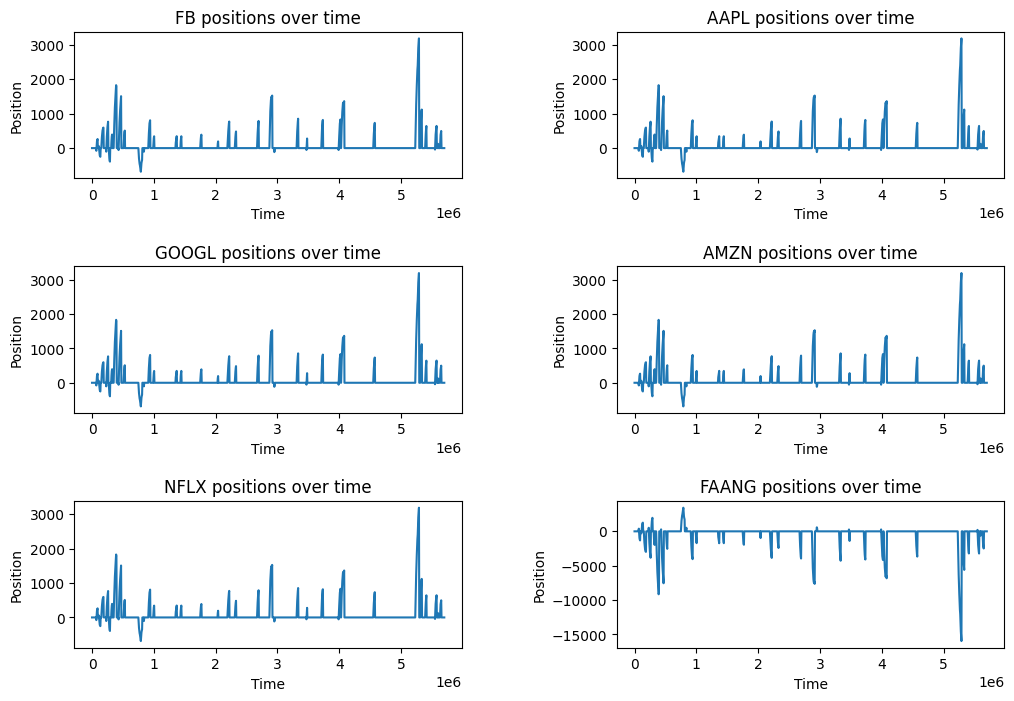

In [69]:
plt.figure(figsize=(12, 8))
timestamps = list(pos_storage.keys())
for i, tick in enumerate(tickers):
    plt.subplot(3, 2, i+1)
    plt.plot(timestamps, [pos_storage[t][tick] for t in timestamps])
    plt.title(f'{tick} positions over time')
    plt.xlabel('Time')
    plt.ylabel('Position')
plt.subplots_adjust(wspace=0.4, hspace=0.6)

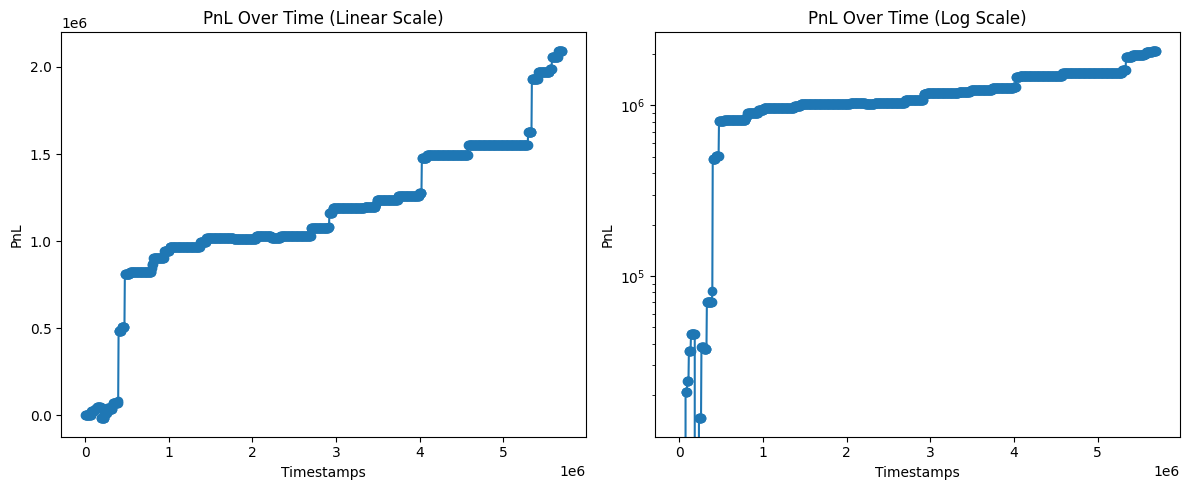

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(timestamps, list(pnl_over_time.values()), marker='o')
ax1.set_title('PnL Over Time (Linear Scale)')
ax1.set_xlabel('Timestamps')
ax1.set_ylabel('PnL')

# Log plot
ax2.plot(timestamps, list(pnl_over_time.values()), marker='o')
ax2.set_title('PnL Over Time (Log Scale)')
ax2.set_xlabel('Timestamps')
ax2.set_ylabel('PnL')
ax2.set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()